# gradient descent

In [ ]:
knob_weight = 0.5
input = 0.5
goal_pred = 0.8

pred = input * knob_weight
error = (pred - goal_pred) ** 2

print(error)

# hot and cold learning

In [9]:
def neural_network(input, weight):
    predictions = input * weight
    return predictions

In [10]:
lr = 0.01
weight = 0.1
number_of_toes = [8.5]
win_or_lose = [0]
input = number_of_toes[0]
true = win_or_lose[0]

In [ ]:
for iteration in range(100):

    pred = neural_network(input, weight)
    error = (pred - true)**2
    
    pred_up = neural_network(input, weight+lr)
    error_up = (pred_up - true)**2      
    
    pred_dn = neural_network(input, weight-lr)
    error_dn = (pred_dn - true)**2
 

    if error_dn > error_up:
        weight += lr 
    else:
        weight -= lr 
        
    if iteration % 1 == 0:
        print(f"{error: .4f}")
        
        

# finding direction and amount from error

In [13]:
weight = 0.5
goal_pred = 0.8
input = 0.5

for iteration in range(20):
    pred = input * weight
    error = (pred - goal_pred) ** 2
    direction_and_amount = (pred - goal_pred) * input
    weight = weight - direction_and_amount
    
    print(f"Error : {error: .4f}, Prediction: {pred: .4f}")

Error :  0.3025, Prediction:  0.2500
Error :  0.1702, Prediction:  0.3875
Error :  0.0957, Prediction:  0.4906
Error :  0.0538, Prediction:  0.5680
Error :  0.0303, Prediction:  0.6260
Error :  0.0170, Prediction:  0.6695
Error :  0.0096, Prediction:  0.7021
Error :  0.0054, Prediction:  0.7266
Error :  0.0030, Prediction:  0.7449
Error :  0.0017, Prediction:  0.7587
Error :  0.0010, Prediction:  0.7690
Error :  0.0005, Prediction:  0.7768
Error :  0.0003, Prediction:  0.7826
Error :  0.0002, Prediction:  0.7869
Error :  0.0001, Prediction:  0.7902
Error :  0.0001, Prediction:  0.7927
Error :  0.0000, Prediction:  0.7945
Error :  0.0000, Prediction:  0.7959
Error :  0.0000, Prediction:  0.7969
Error :  0.0000, Prediction:  0.7977


- changing input to 2

In [6]:
weight = 0.5
goal_pred = 0.8
input = 2
alpha = 0.1

for iteration in range(20):
    pred = input * weight
    error = (pred - goal_pred) ** 2
    direction_and_amount = (pred - goal_pred) * input
    change = direction_and_amount * alpha
    weight = weight - change
    
    print(f"Error : {error: .4f}, Prediction: {pred: .4f}")

Error :  0.0400, Prediction:  1.0000
Error :  0.0144, Prediction:  0.9200
Error :  0.0052, Prediction:  0.8720
Error :  0.0019, Prediction:  0.8432
Error :  0.0007, Prediction:  0.8259
Error :  0.0002, Prediction:  0.8156
Error :  0.0001, Prediction:  0.8093
Error :  0.0000, Prediction:  0.8056
Error :  0.0000, Prediction:  0.8034
Error :  0.0000, Prediction:  0.8020
Error :  0.0000, Prediction:  0.8012
Error :  0.0000, Prediction:  0.8007
Error :  0.0000, Prediction:  0.8004
Error :  0.0000, Prediction:  0.8003
Error :  0.0000, Prediction:  0.8002
Error :  0.0000, Prediction:  0.8001
Error :  0.0000, Prediction:  0.8001
Error :  0.0000, Prediction:  0.8000
Error :  0.0000, Prediction:  0.8000
Error :  0.0000, Prediction:  0.8000


- the outputs have exploded here
- and was corrected by setting the alpha values to 0.1

# multiple inputs

In [4]:
def neural_network(input, weights):
    out = 0
    for i in range(len(input)):
        out += input[i] * weights[i]
    return out

def ele_mul(scaler, vector):
    out = [0, 0, 0]
    for i in range(len(vector)):
        out[i] = scaler * vector[i]
    return out

In [5]:
toes = [8.5, 9.5, 9.9, 9.0] 
wlrec = [0.65, 0.8, 0.8, 0.9] 
nfans = [1.2, 1.3, 0.5, 1.0]

wins_or_lose = [1, 1, 0, 1]
true = wins_or_lose[0]

alpha = 0.01
weights = [0.1, 0.2, -0.1]
input = [toes[0], wlrec[0], nfans[0]]

# training
for i in range(3):
    pred = neural_network(input, weights)
    
    error = (pred - true) ** 2
    delta = pred - true
    
    weighted_deltas = ele_mul(delta, input)
    
    for i in range(len(input)):
        weights[i] -= weighted_deltas[i] * alpha
        
neural_network(input, weights)

0.997571162993086

# multiple outputs

In [7]:
weights = [0.3, 0.2, 0.9]
wlrec = [0.65, 1.0, 1.0, 0.9]

hurt = [0.1, 0.0, 0.0, 0.1] 
win = [ 1, 1, 0, 1] 
sad = [0.1, 0.0, 0.1, 0.2]

input = wlrec[0]
true = [hurt[0], win[0], sad[0]]

def neural_network(input, weights):
    pred = ele_mul(input, weights)
    return pred

pred = neural_network(input, weights)

errors = [0, 0, 0]
deltas = [0, 0, 0]
for i in range(len(pred)):
    errors[i] = (pred[i] - true[i]) ** 2
    deltas[i] = pred[i] - true[i]
    
weight_deltas = ele_mul(input, deltas)

for i in range(len(weight_deltas)):
    weights[i] -= weighted_deltas[i]
    
print(weights)

[0.37974935609374866, 0.2060984801718749, 0.9112587326249998]


# multiple inputs and outputs

In [14]:
weights = [ [0.1, 0.1, -0.3],# hurt? 
           [0.1, 0.2, 0.0], # win?
           [0.0, 1.3, 0.1] ]# sad?

def vec_mat_mul(vector, matrix):
    output = [0, 0, 0]
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            output[i] += vector[i] * matrix[i][j]
    return output

In [15]:
toes = [8.5, 9.5, 9.9, 9.0] 
wlrec = [0.65,0.8, 0.8, 0.9] 
nfans = [1.2, 1.3, 0.5, 1.0]
inputs = [toes[0],wlrec[0],nfans[0]]
print(f"input: {input}")

hurt = [0.1, 0.0, 0.0, 0.1] 
win = [ 1, 1, 0, 1] 
sad = [0.1, 0.0, 0.1, 0.2]
true = [hurt[0], win[0], sad[0]]
print(f"output: {true}")

input: [8.5, 0.65, 1.2]
output: [0.1, 1, 0.1]


In [16]:
def neural_network(inputs, weights):
    pred = vec_mat_mul(inputs, weights)
    return pred

In [17]:
pred = neural_network(inputs, weights)

# using real world data

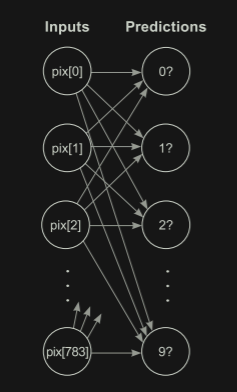 
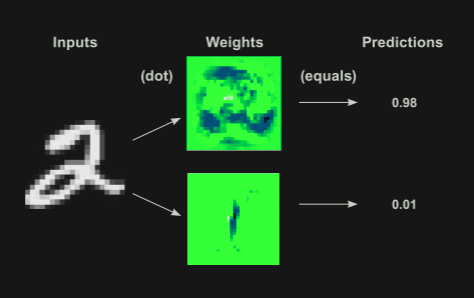

# Chapter 6: Introduction to Backpropagation

## street light problem

In [3]:
import numpy as np
streetlights = np.array([[1, 0, 1],
                         [0, 1, 1],
                         [0, 0, 1],
                         [1, 1, 1],
                         [0, 1, 1],
                         [1, 0, 1]])

walk_vs_stop = np.array([0, 1, 0, 1, 1, 0])

weights = np.array([0.5, 0.48, -0.7])

input = streetlights[0]
goal = walk_vs_stop[0]
alpha = 0.1

for i in range(20):
    pred = input.dot(weights)
    error = (pred - goal) ** 2
    delta = pred - goal
    weighted_delta = delta * input
    weights = weights - (weighted_delta * alpha)
    
print(weighted_delta)    
print(weights)

[-0.0028823 -0.        -0.0028823]
[ 0.59884708  0.48       -0.60115292]
